<a href="https://colab.research.google.com/github/tae898/DeepLearning/blob/master/Chapter01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is deep learning?

There are many videos explaning deep learning but I personally think Andrew Ng is the best person in this. [Watch his video](https://youtu.be/CS4cs9xVecg). He has a lot of videos from deeplearning.ai and Stanford lectures on Youtube. All of them are worth watching!


---


Although deep learning is now being used everywhere, **computer vision**, **automatic speech recognition (ASR)**, and **natural language processing (NLP)** are the three most popular applications. And I'd like to briefly mention them below 


# Computer vision

[Age and gender estimation](https://github.com/tae898/age-gender-estimation)



The below code is from the Colab Code snippets. Press `Ctrl + Alt + P` to see code snippets pane. There you can import a lot of code snippets made by Google

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

After running code below, your web browser will ask for the camera use permission. Press yes and click the <button>Capture</button> button to take a picture of your face.



<IPython.core.display.Javascript object>

Saved to photo.jpg


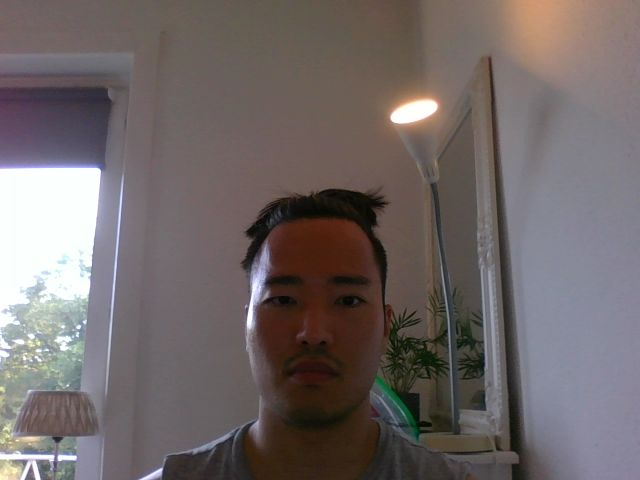

In [2]:
from IPython.display import Image
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

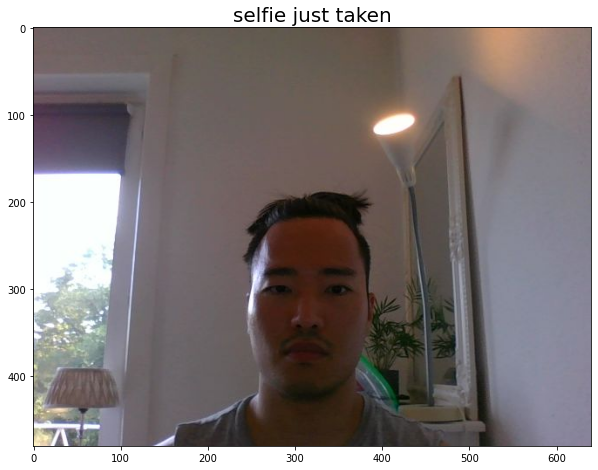

In [3]:
import matplotlib.pyplot as plt
import cv2

img_BGR = cv2.imread('photo.jpg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10));
plt.imshow(img_RGB);
plt.title('selfie just taken', fontsize=20);

In [ ]:
!pip3 freeze

In [4]:
!git clone https://github.com/tae898/age-gender-estimation
!cp photo.jpg age-gender-estimation/photo.jpg
!cd age-gender-estimation && python3 for_colab.py && cp photo_annotated.jpg ../

fatal: destination path 'age-gender-estimation' already exists and is not an empty directory.
Using TensorFlow backend.
2020-06-22 18:37:37.773918: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-06-22 18:37:40.303222: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-22 18:37:40.306293: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-06-22 18:37:40.306346: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (1d0a9637aac2): /proc/driver/nvidia/version does not exist
2020-06-22 18:37:40.311263: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300000000 Hz
2020-06-22 18:37:40.311525: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5bd6000 initialized 

# Automatic Speech Recognition (ASR)

# Natural language processing (NLP)